**Hand Gesture Detection assignment**



   Instruction/Hints are mentioned, to run the cell you have to do shift+enter



In [1]:
!pip install opendatasets
!pip install keras
!pip install tensorflow
!pip install rasa==1.1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.2/447.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.2/516.2 kB 9.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of rasa to determine which version is compatible with other requirements. This could take a while.
ERROR: Ignored the following versions that require a different python version: 1.10.10 Requires-Python >=3.6,<3.8; 1.10.11 Requires-Python >=3.6,<3.8; 1.10.12 Requires-Python >=3.6,<3.8; 1.10.13 Requires-Python >=3.6,<3.8; 1.10.14 Requires-Python >=3.6,<3.8; 1.10.15 Requires-Python >=3.6,<3.8; 1.10.16 Requires-Python >=3.6,<3.8; 1.10.17 Requires-Python >=3.6,<3.8; 1.10

In [2]:
# Import all the necessary dependcies

import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

You will have to make an account on kaggle and will have to use that 'username' and key.

In [3]:
# Download the dataset from kaggle


import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/koryakinp/fingers")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lavinagoyal
Your Kaggle Key: ··········


100%|██████████| 363M/363M [00:04<00:00, 88.3MB/s]


In [56]:
import os
import cv2
import numpy as np

# Path to the dataset directory
dataset_dir = '/content/fingers/test'
dataset_dir2='/content/fingers/train'
# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each image file
for filename in os.listdir(dataset_dir):
    # Load the image using OpenCV
     img_path = os.path.join(dataset_dir, filename)
     img = cv2.imread(img_path,0)
     if img is None:
      continue
    # Resize the image to a desired size (e.g., 64x64)
     img_resized = cv2.resize(img, (64, 64))

    # Append the image to the images list
     images.append(img_resized)

    # Get the label from the filename (the first character)
     label =filename[-6]

    # Append the label to the labels list
     labels.append(label)
x_test=np.array(images)
y_test=np.array(labels)
images2=[]
labels2=[]
# Iterate through each image file
for filename in os.listdir(dataset_dir2):
    # Load the image using OpenCV
     img_path = os.path.join(dataset_dir2, filename)
     img2 = cv2.imread(img_path,0)

    # Resize the image to a desired size (e.g., 64x64)
     img_resized2= cv2.resize(img2, (64, 64))

    # Append the image to the images list
     images2.append(img_resized2)

    # Get the label from the filename (the first character)
     label =filename[-6]

    # Append the label to the labels list
     labels2.append(label)
# Convert the lists to NumPy arrays
x_train= np.array(images2)
y_train = np.array(labels2)

In [57]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [58]:
from tensorflow.keras.utils import to_categorical
num_classes=6

Y_train = to_categorical(y_train, num_classes)

Y_test = to_categorical(y_test, num_classes)

In [59]:
print ("Y_train shape: " + str(Y_train.shape))
print ("Y_test shape: " + str(Y_test.shape))

Y_train shape: (18000, 6)
Y_test shape: (3600, 6)


In [60]:
# MAKE YOUR CNN MODEL HERE
import tensorflow as tf
from tensorflow.keras import layers
def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    x = tf.keras.layers.Conv2D(8, (4, 4), strides=(1, 1), padding='same')(input_img)
    ##  Apply RELU to previous layer
    x = tf.keras.layers.Activation('relu')(x)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    x = tf.keras.layers.MaxPooling2D((8, 8), strides=(8, 8), padding='same')(x)
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    x = tf.keras.layers.Conv2D(16, (2, 2), strides=(1, 1), padding='same')(x)
    ## RELU
    x = tf.keras.layers.Activation('relu')(x)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    x = tf.keras.layers.MaxPooling2D((4, 4), strides=(4, 4), padding='same')(x)
    ## FLATTEN
    x = tf.keras.layers.Flatten()(x)
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'"
    output = tf.keras.layers.Dense(6, activation='softmax')(x)
    # return your model:
    model = tf.keras.Model(inputs=input_img, outputs=output)
    return model

In [61]:
# COMPILE YOUR MODEL HERE
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
conv_model = convolutional_model((64, 64,1))
conv_model.compile(optimizer =optimizer,loss =loss,metrics =metrics)
conv_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 8)         136       
                                                                 
 activation_4 (Activation)   (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 activation_5 (Activation)   (None, 8, 8, 16)          0         
                                                           

In [62]:
# SLICE THE DATASET FOR 1800 IMAGES FOR TRAINING AND 300 FOR TESTING, ALSO MENTION THE BATCH SIZE
num_train_images = 1800
num_test_images = 300
batch_size=32
train_dataset = tf.data.Dataset.from_tensor_slices((x_train[0:1800], Y_train[0:num_train_images]))
train_dataset = train_dataset.batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test[0:300], Y_test[0:num_test_images]))
test_dataset = test_dataset.batch(batch_size)
print(test_dataset)
print(train_dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>


In [64]:
# TWEAK THE NUMBER OF IMAGES TO GET BETTER RESULTS
num_epochs=30
history = conv_model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/30
57/57 [==============================] - 4s 65ms/step - loss: 0.6415 - accuracy: 0.7528 - val_loss: 0.5821 - val_accuracy: 0.7733
Epoch 2/30
57/57 [==============================] - 3s 51ms/step - loss: 0.5020 - accuracy: 0.8022 - val_loss: 0.4680 - val_accuracy: 0.8167
Epoch 3/30
57/57 [==============================] - 2s 44ms/step - loss: 0.4088 - accuracy: 0.8389 - val_loss: 0.4014 - val_accuracy: 0.8400
Epoch 4/30
57/57 [==============================] - 2s 43ms/step - loss: 0.3514 - accuracy: 0.8672 - val_loss: 0.3543 - val_accuracy: 0.8567
Epoch 5/30
57/57 [==============================] - 3s 57ms/step - loss: 0.3090 - accuracy: 0.8839 - val_loss: 0.3174 - val_accuracy: 0.8633
Epoch 6/30
57/57 [==============================] - 2s 40ms/step - loss: 0.2774 - accuracy: 0.8967 - val_loss: 0.2862 - val_accuracy: 0.8667
Epoch 7/30
57/57 [==============================] - 2s 40ms/step - loss: 0.2504 - accuracy: 0.9067 - val_loss: 0.2600 - val_accuracy: 0.8767
Epoch 8/30
57

PLOT YOUR RESULTS HERE


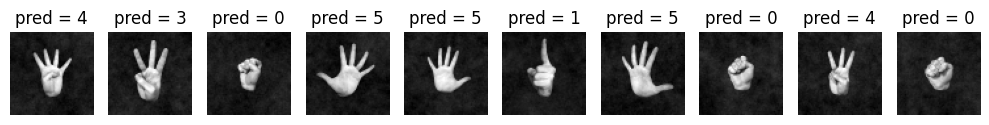

In [65]:
import random
import cv2
from matplotlib import pyplot as plt

numbers = list(range(1, 1001))
random_array = random.sample(numbers, 10)

fig = plt.figure(figsize=(10, 7))

for i, idx in enumerate(random_array):
    img_resized = cv2.resize(x_test[idx], (64, 64))
    y_pred = np.argmax(conv_model.predict(np.expand_dims(x_test[idx], axis=0),verbose=0))
    ax = fig.add_subplot(1, 10, i+1)
    ax.imshow(img_resized, cmap='gray')
    ax.axis('off')
    ax.set_title("pred = " + str(y_pred))

plt.tight_layout()
plt.show()